<a href="https://colab.research.google.com/github/kgy1008/Data-Science-Analysis/blob/main/FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학생 성적 데이터 분석 (2020314968 김가연)
## 각 과목의 시험에서 자신이 맡은 학생들의 성적을 향상시키는 가장 좋은 방법은 무엇일까?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
temp=files.upload()

Saving exams.csv to exams.csv


In [ ]:
df=pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,bachelor's degree,free/reduced,completed,81,85,86
1,male,group C,some high school,standard,completed,70,68,68
2,female,group B,associate's degree,free/reduced,none,58,69,67
3,male,group B,some high school,standard,none,80,77,65
4,male,group D,some high school,free/reduced,none,64,62,59


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

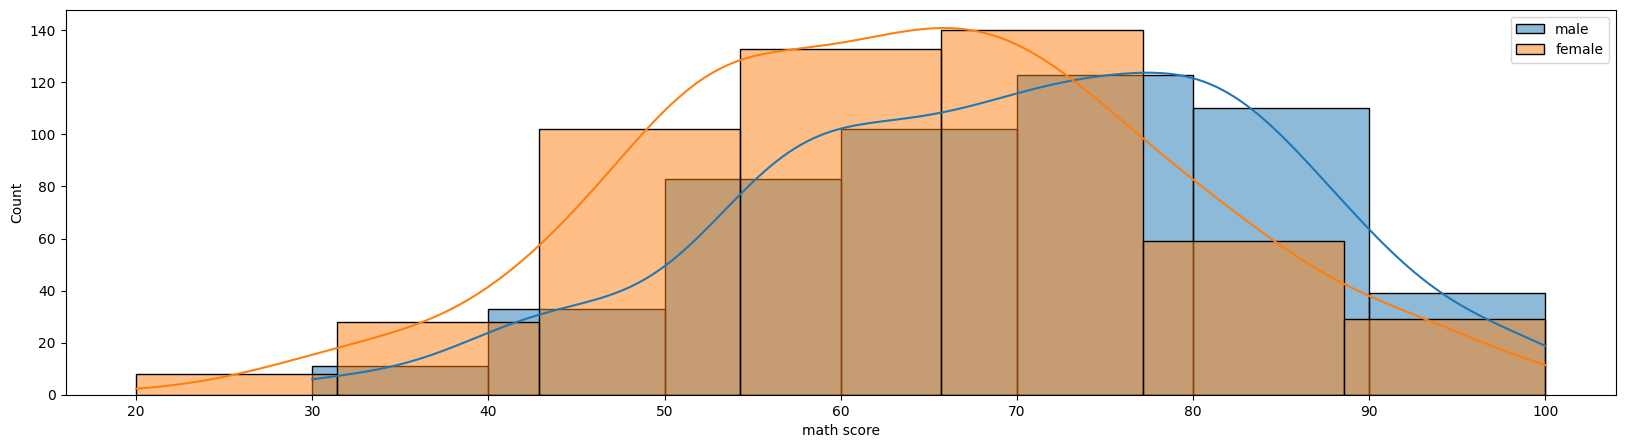

In [ ]:
# 성별에 따른 수학 점수 분포
male_data=df[df.gender=='male']
female_data=df[df.gender=='female']
plt.figure(figsize=(20,5))
sns.histplot(male_data['math score'],kde=True, bins=7,alpha=0.5,label='male')
sns.histplot(female_data['math score'],kde=True, bins=7,alpha=0.5,label='female')
plt.legend()

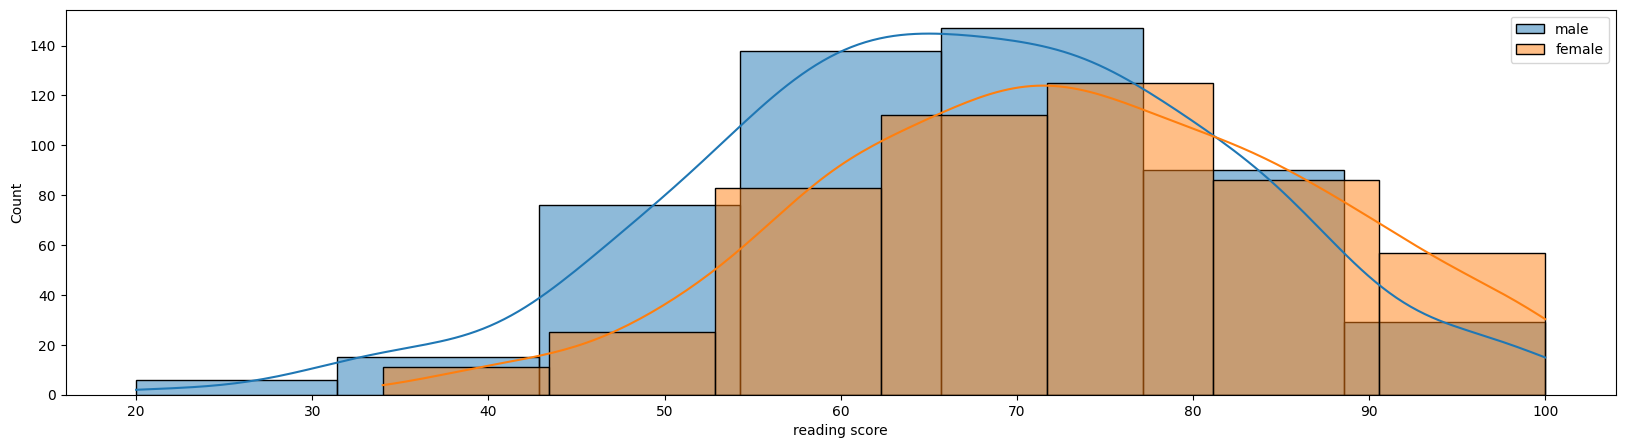

In [ ]:
# 성별에 따른 읽기 점수 분포
male_data=df[df.gender=='male']
female_data=df[df.gender=='female']
plt.figure(figsize=(20,5))
sns.histplot(male_data['reading score'],kde=True, bins=7,alpha=0.5,label='male')
sns.histplot(female_data['reading score'],kde=True, bins=7,alpha=0.5,label='female')
plt.legend()

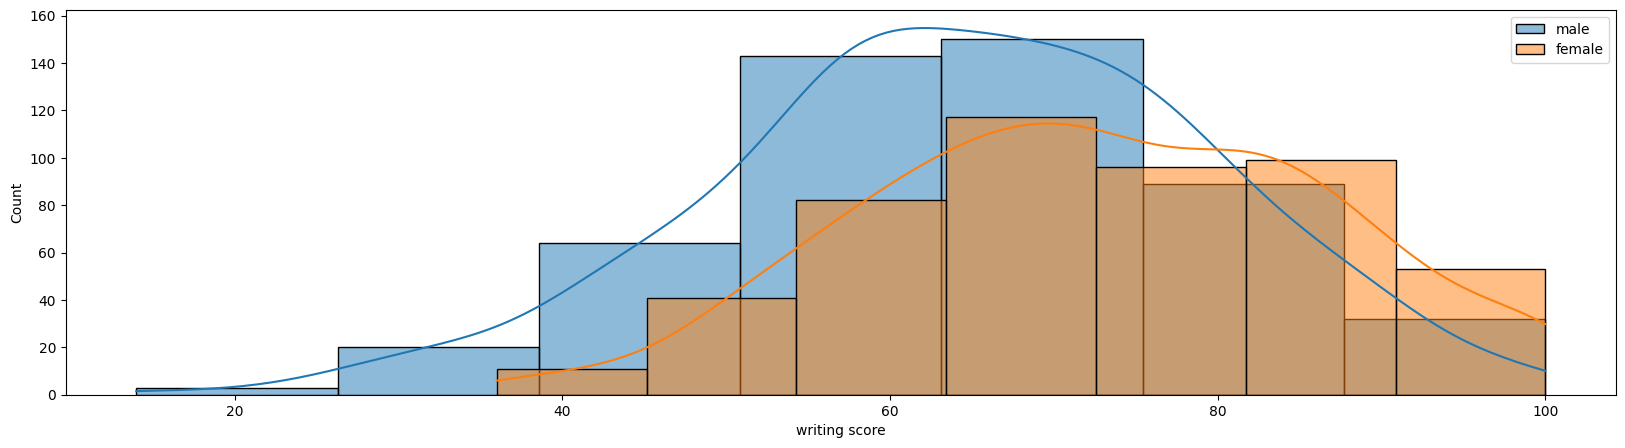

In [ ]:
# 성별에 따른 쓰기 점수 분포
male_data=df[df.gender=='male']
female_data=df[df.gender=='female']
plt.figure(figsize=(20,5))
sns.histplot(male_data['writing score'],kde=True, bins=7,alpha=0.5,label='male')
sns.histplot(female_data['writing score'],kde=True, bins=7,alpha=0.5,label='female')
plt.legend()

위의 결과를 보았을 때,
수학 점수의 경우 남학생이 상위권에 여학생보다 더 많이 포진해있는 반면 읽기 점수와 쓰기 점수의 경우에는 여학생이 남학생보다 우수한 경향을 보였다.

<Axes: xlabel='parental level of education', ylabel='math score'>

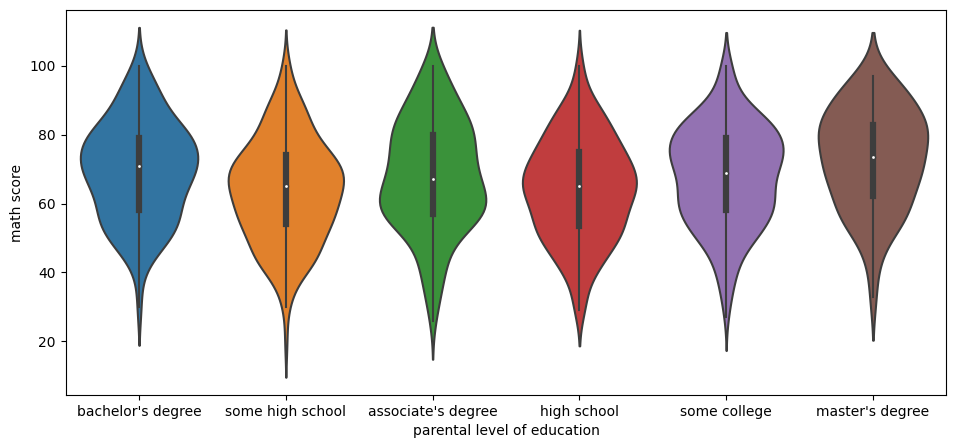

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,2)
sns.violinplot(x='parental level of education',y='math score',data=df)

<Axes: xlabel='parental level of education', ylabel='writing score'>

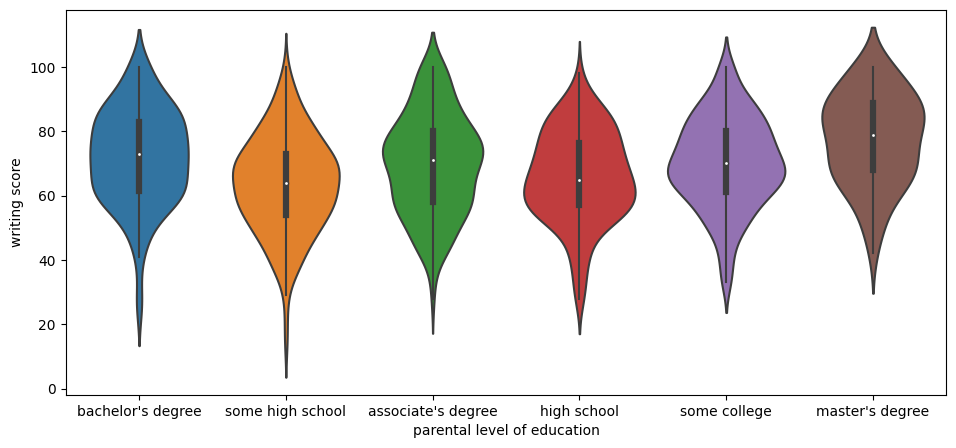

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,2)
sns.violinplot(x='parental level of education',y='writing score',data=df)

<Axes: xlabel='parental level of education', ylabel='reading score'>

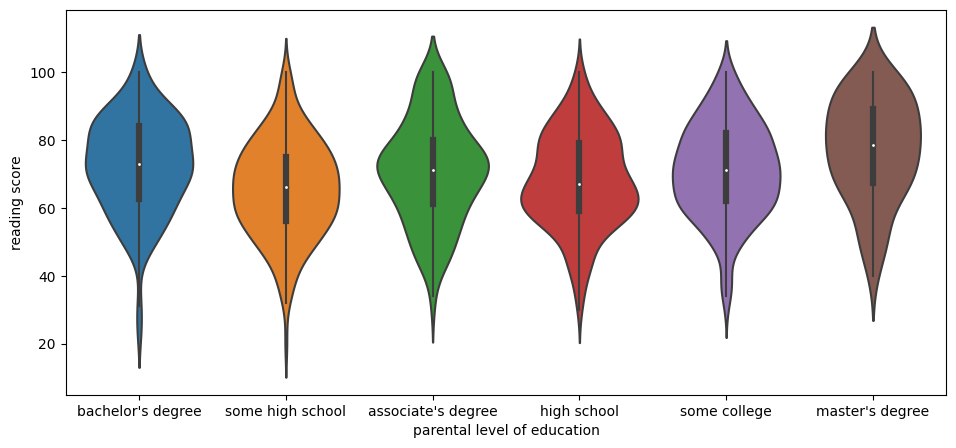

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,2)
sns.violinplot(x='parental level of education',y='reading score',data=df)

  violinplot을 이용하여 분석해보았을 때, 부모의 교육 수준과 성적 간의 유의미한 상관관계를 찾기는 힘들었다.

<Axes: xlabel='race/ethnicity', ylabel='math score'>

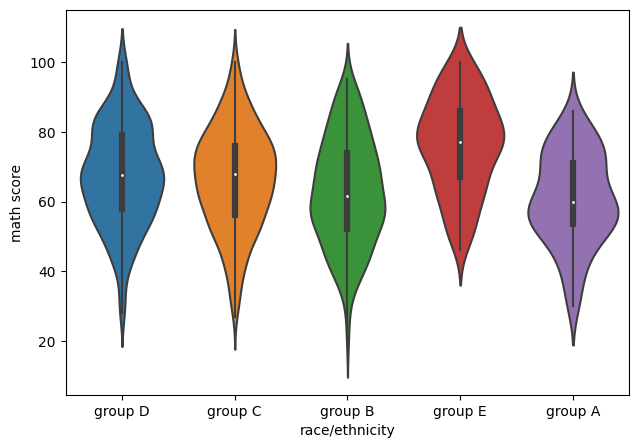

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.violinplot(x='race/ethnicity',y='math score',data=df)

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

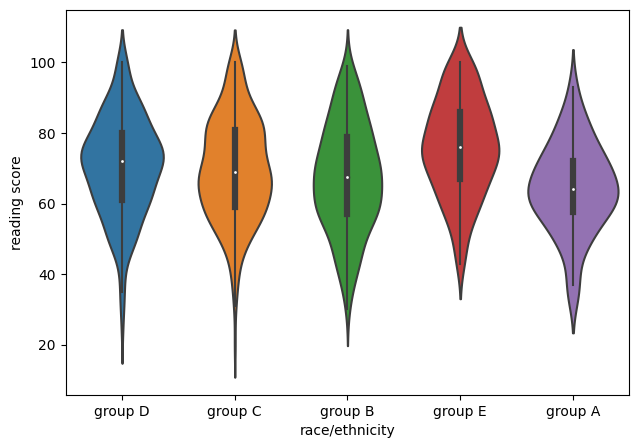

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.violinplot(x='race/ethnicity',y='reading score',data=df)

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

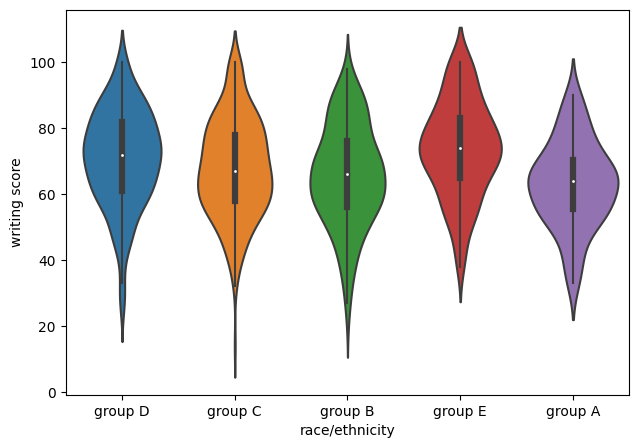

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.violinplot(x='race/ethnicity',y='writing score',data=df)

인종에 따라 각각의 과목별 점수 분표 양상을 확인해보았다. 수학 성적을 제외하고는 인종 간의 성적 분포 양상이 크게 차이 나지 않았다. 때문에 인종의 경우에는 성적에 유의미한 영향을 끼친다고 볼 수 없다고 생각한다. 다만 group E가 모든 과목에 있어 가장 우수한 성적 분포를 보이고 있고 특히 수학 과목의 경우에는 두드러진 강세를 보이는 점은 주목할만 하다.

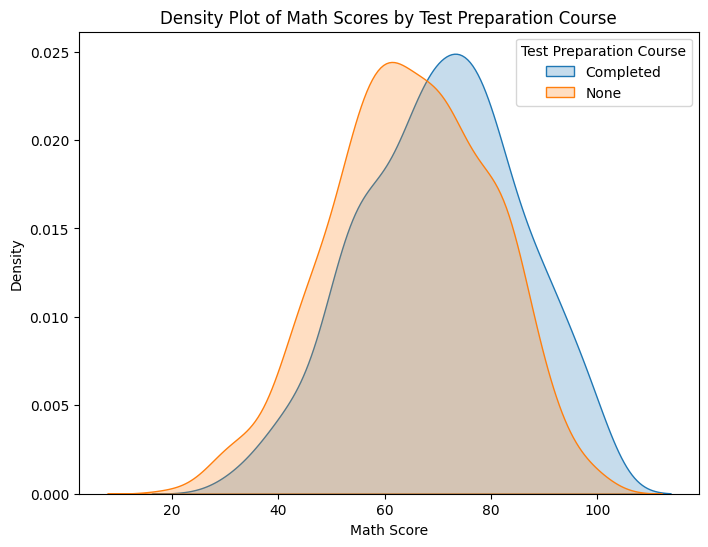

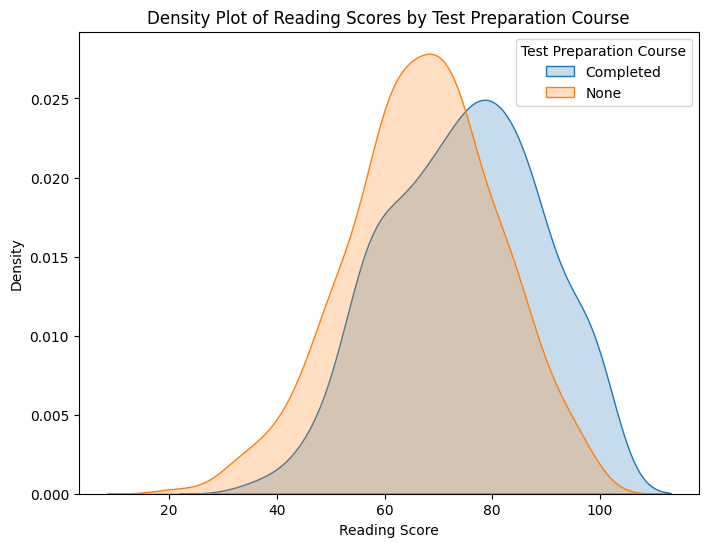

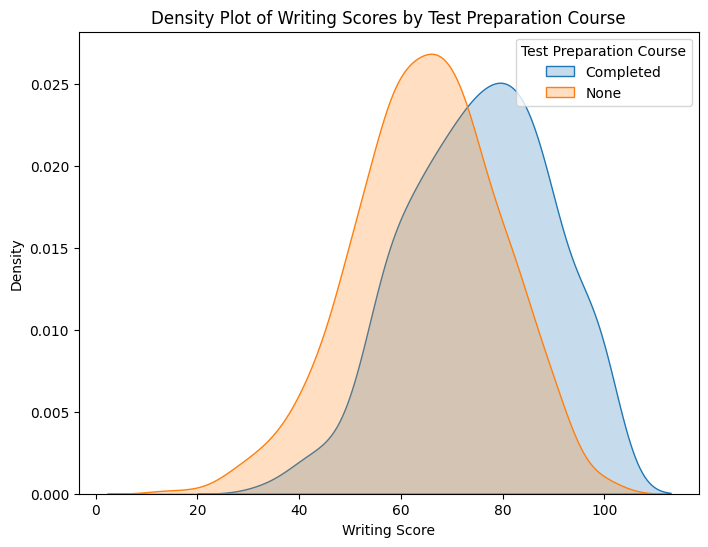

In [ ]:
plt.figure(figsize=(8, 6))

# 수학 점수에 대한 밀도 플롯
sns.kdeplot(df[df['test preparation course'] == 'completed']['math score'], label='Completed', fill=True)
sns.kdeplot(df[df['test preparation course'] == 'none']['math score'], label='None', fill=True)

plt.title('Density Plot of Math Scores by Test Preparation Course')
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.legend(title='Test Preparation Course')

plt.figure(figsize=(8, 6))

# 읽기 점수에 대한 밀도 플롯
sns.kdeplot(df[df['test preparation course'] == 'completed']['reading score'], label='Completed', fill=True)
sns.kdeplot(df[df['test preparation course'] == 'none']['reading score'], label='None', fill=True)

plt.title('Density Plot of Reading Scores by Test Preparation Course')
plt.xlabel('Reading Score')
plt.ylabel('Density')
plt.legend(title='Test Preparation Course')

plt.figure(figsize=(8, 6))

# 쓰기 점수에 대한 밀도 플롯
sns.kdeplot(df[df['test preparation course'] == 'completed']['writing score'], label='Completed', fill=True)
sns.kdeplot(df[df['test preparation course'] == 'none']['writing score'], label='None', fill=True)

plt.title('Density Plot of Writing Scores by Test Preparation Course')
plt.xlabel('Writing Score')
plt.ylabel('Density')
plt.legend(title='Test Preparation Course')

plt.show()


당연한 결과이지만, 대제적으로 시험 대비를 한 학생들이 모든 과목에 있어서 높은 점수 양상 분포를 보이고 있다.

In [ ]:
def categorize_score(score):
    if score >= 90:
        return 'Very High'
    elif 70 <= score < 90:
        return 'High'
    elif 50 <= score < 70:
        return 'Medium'
    else:
        return 'Low'

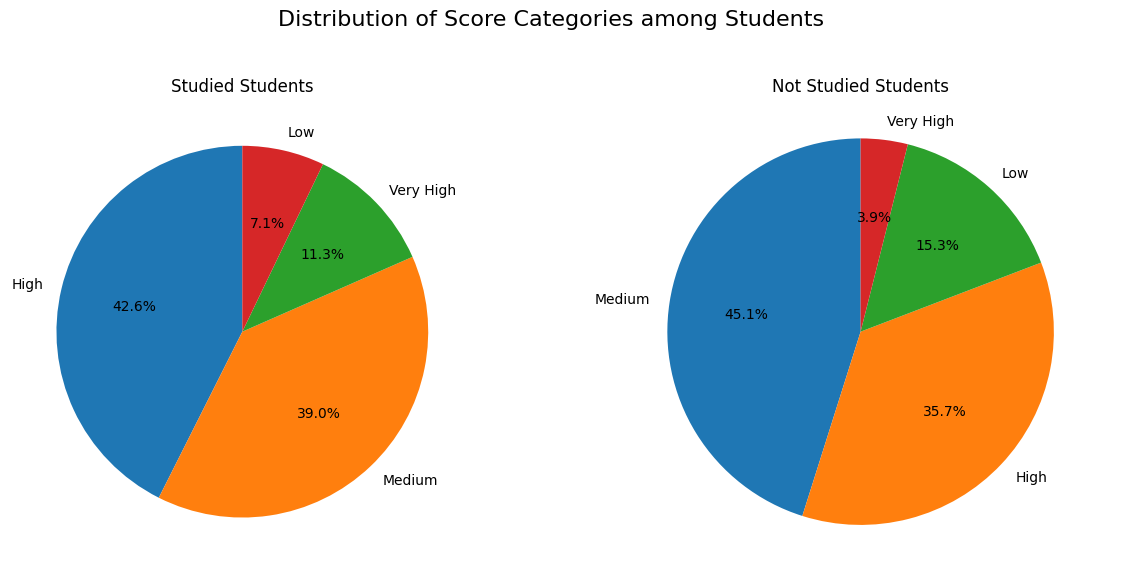

In [ ]:
studied_students = df[df['test preparation course'] == 'completed'].copy()
not_studied_students = df[df['test preparation course'] == 'none'].copy()

studied_students['score_category'] = studied_students['math score'].apply(categorize_score)
not_studied_students['score_category'] = not_studied_students['math score'].apply(categorize_score)

category_counts_studied = studied_students['score_category'].value_counts(normalize=True)
category_counts_not_studied = not_studied_students['score_category'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
labels = category_counts_studied.index.tolist()
sizes = category_counts_studied.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Studied Students')

plt.subplot(1, 2, 2)
labels = category_counts_not_studied.index.tolist()
sizes = category_counts_not_studied.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Not Studied Students')

plt.suptitle('Distribution of Score Categories among Students', fontsize=16)
plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


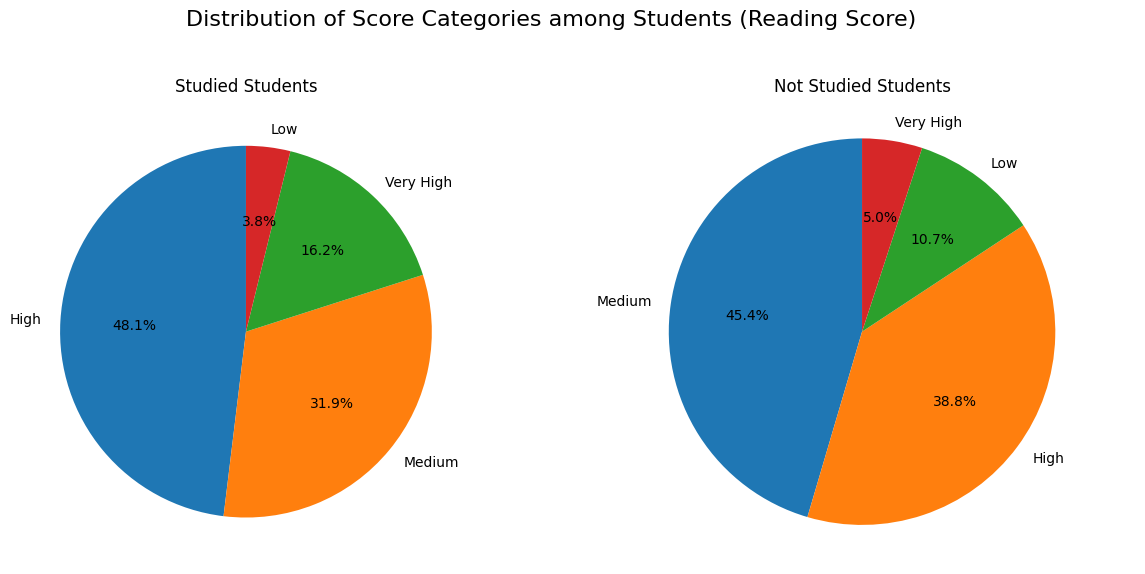

In [ ]:
studied_students = df[df['test preparation course'] == 'completed'].copy()
not_studied_students = df[df['test preparation course'] == 'none'].copy()

studied_students['score_category'] = studied_students['reading score'].apply(categorize_score)
not_studied_students['score_category'] = not_studied_students['reading score'].apply(categorize_score)

category_counts_studied = studied_students['score_category'].value_counts(normalize=True)
category_counts_not_studied = not_studied_students['score_category'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
labels = category_counts_studied.index.tolist()
sizes = category_counts_studied.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Studied Students')

plt.subplot(1, 2, 2)
labels = category_counts_not_studied.index.tolist()
sizes = category_counts_not_studied.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Not Studied Students')

plt.suptitle('Distribution of Score Categories among Students (Reading Score)', fontsize=16)
plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


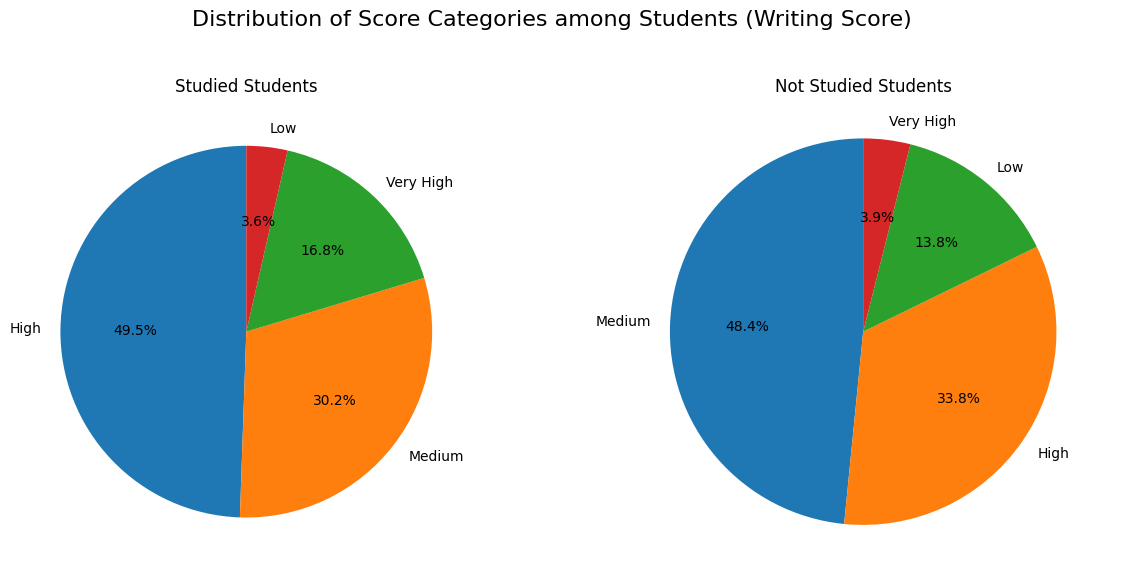

In [ ]:
studied_students = df[df['test preparation course'] == 'completed'].copy()
not_studied_students = df[df['test preparation course'] == 'none'].copy()

studied_students['score_category'] = studied_students['writing score'].apply(categorize_score)
not_studied_students['score_category'] = not_studied_students['writing score'].apply(categorize_score)

category_counts_studied = studied_students['score_category'].value_counts(normalize=True)
category_counts_not_studied = not_studied_students['score_category'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
labels = category_counts_studied.index.tolist()
sizes = category_counts_studied.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Studied Students')

plt.subplot(1, 2, 2)
labels = category_counts_not_studied.index.tolist()
sizes = category_counts_not_studied.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Not Studied Students')

plt.suptitle('Distribution of Score Categories among Students (Writing Score)', fontsize=16)
plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


각 과목의 점수 분포를 4가지 범주로 나누어, 시험 공부를 한 학생(Completed)의 점수 범주 분포와 시험 공부를 하지 않은 학생(None)의 점수 범주 분포를 원 그래프로 시각화하여 그 분포 비율을 확인해보았다.   
그 결과, 모든 과목에 있어 시험 공부를 한 학생의 성적 기준이 very high와 high가 되는 비율이 확연히 높다는 점을 다시 한번 확인할 수 있었다.

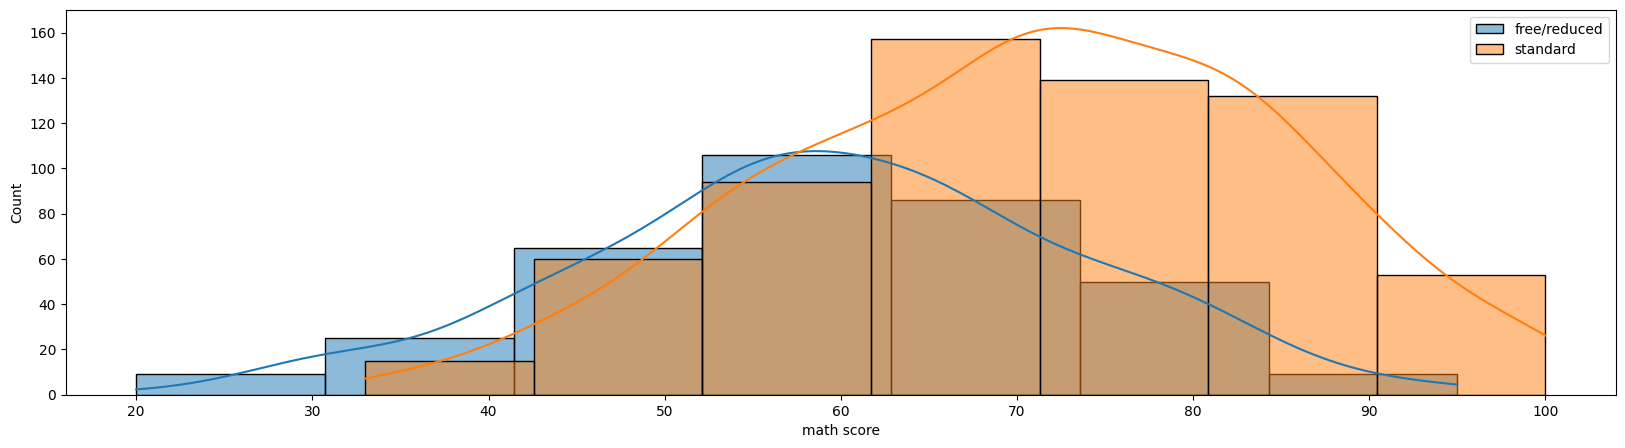

In [ ]:
# 점심 유형에 따른 점수 분포
free_data=df[df.lunch=='free/reduced']
standard_data=df[df.lunch=='standard']
plt.figure(figsize=(20,5))

sns.histplot(free_data['math score'],kde=True, bins=7,alpha=0.5,label='free/reduced')
sns.histplot(standard_data['math score'],kde=True, bins=7,alpha=0.5,label='standard')
plt.legend()

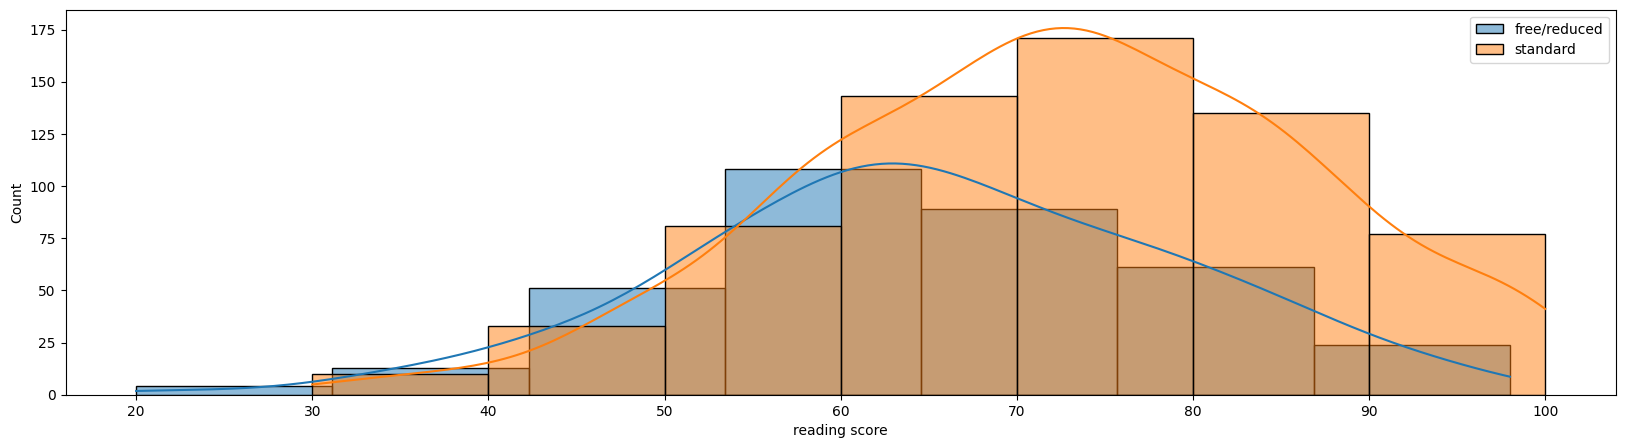

In [ ]:
free_data=df[df.lunch=='free/reduced']
standard_data=df[df.lunch=='standard']
plt.figure(figsize=(20,5))

sns.histplot(free_data['reading score'],kde=True, bins=7,alpha=0.5,label='free/reduced')
sns.histplot(standard_data['reading score'],kde=True, bins=7,alpha=0.5,label='standard')
plt.legend()

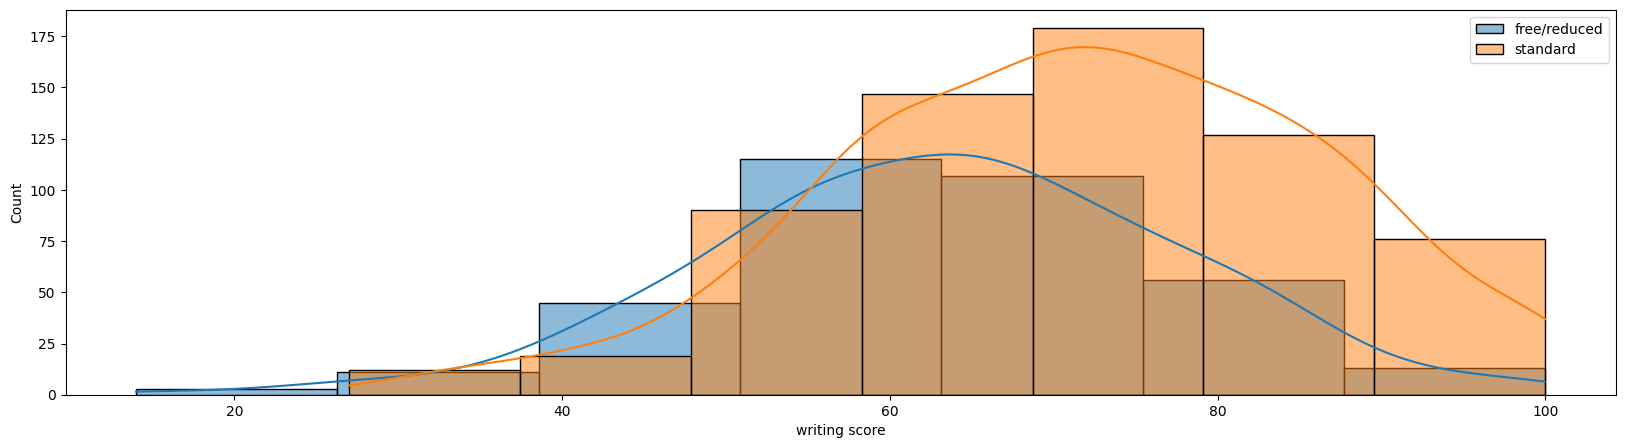

In [ ]:
free_data=df[df.lunch=='free/reduced']
standard_data=df[df.lunch=='standard']
plt.figure(figsize=(20,5))

sns.histplot(free_data['writing score'],kde=True, bins=7,alpha=0.5,label='free/reduced')
sns.histplot(standard_data['writing score'],kde=True, bins=7,alpha=0.5,label='standard')
plt.legend()

수학, 쓰기, 읽기 점수 분포 모두 점심식사 유형이 standard일 경우 무상급식 혜택을 받는 학생들보다 성적이 높은 양상을 띄고 있다.

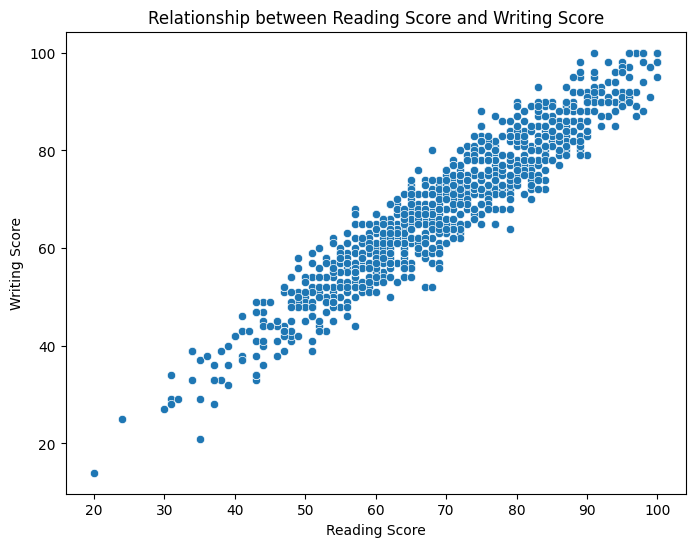

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reading score', y='writing score', data=df)
plt.title('Relationship between Reading Score and Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

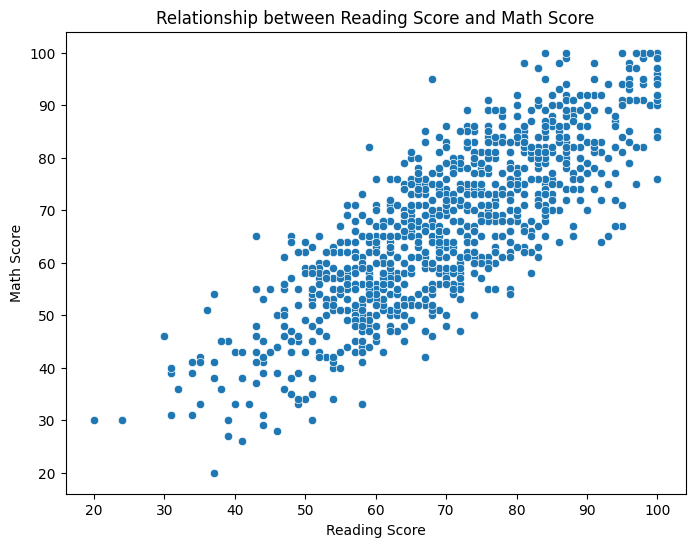

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reading score', y='math score', data=df)
plt.title('Relationship between Reading Score and Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

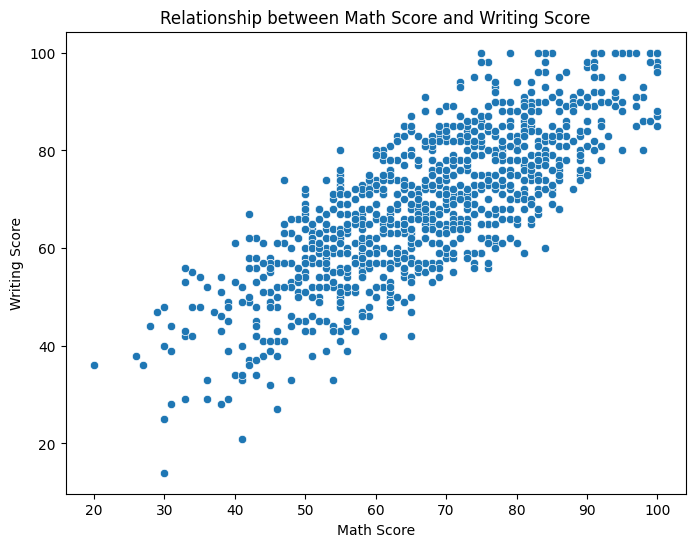

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='writing score', data=df)
plt.title('Relationship between Math Score and Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()

각 과목의 점수 간의 상관 관계를 알아보고자 산점도를 활용해보았다.  
대체적으로, 어느 한 과목의 점수가 높은 학생들이 다른 과목에 있어서도 우수한 성적을 나타내는 것을 알 수 있었다.

# 결론


---


## 관련있는 항목은?
Gender(성별), Lunch(점심식사 유형), Test preparation course(시험 대비 과정)에서 유의미한 분석 결과를 확인할 수 있었다.   
반면, Parental level of education(부모의 교육수준)와 race/ethnicity(인종)의 경우에는 유의미한 분석 결과를 확인할 수 없었다.  


---



## 학생들의 성적 향상을 위해 어떠한 노력을 해야할까?
### 1. 과목에 따라 성별을 나누어 수업 시수를 조정한다.  
예를 들어, 수학 점수의 경우에는 남학생들이 여학생들보다 우수한 경향을 보이므로 읽기와 쓰기 과목에 더 시간을 투자할 수 있도록 수학 과목의 시수를 줄이고 다른 과목의 시수를 늘린다.

### 2. 시험 대비 과정을 하지 않는 학생들은 나머지 공부를 시킨다.
분석 결과, 시험 대비를 하지 않는 학생(None)이 그렇지 않은 학생보다 낮은 점수 분포 양상을 보였다. 때문에 시험 대비를 하지 않는 학생 목록을 뽑아 학교에서 강제적으로 시험을 대비할 수 있는 방안(야간자율학습)등을 마련한다.

### 3. 급식 유형을 standard로 변경한다.
무상이나 할인된 점심 혜택을 받는 학생보다 그렇지 않는 학생들이 모든 과목에 있어 더 높은 점수 분포를 보였다. 때문에 가급적 가능하면 학생들이 standard lunch type을 선택할 수 있도록 장려한다.